# Big Data with Hadoop/HW_3/MDS201803

### 1. Explain the diﬀerence between hypothesis testing and exploratory data analysis?



A statistical hypothesis is an assertion or conjecture about an unkown parameter of some model. In hypothesis testing one is interested in checking whether the hypothesis about the parameter is valid or not, based on the data. On the other hand exploratory data analysis is another statistical methodology which performs initial investigations on the data to identify patterns, detect outliars, spotting anomalies in the data etc. using graphical tools(for visualization), summary statistic values etc.

In other words exploratory data analysis helps in understanding the data and propose a suitable model for it, whereas hypothesis testing is used to validate a proposed model for the data.

### 2. The goal of exploratory data analysis is to build analytical models. Is this a true statement? Why or why not?

Exploratory data analysis is a statistical approach to analyze the data in the very first stage. Exploratory data analysis can not build analytical models but helps in understanding patterns in the data, using which one can propose suitable analytical models. The main goal of EDA is to summarize their main characteristics of the data, often with visual methods and to see what the data can tell us beyond the formal modeling or hypothesis testing task. After performing EDA, one gets an brief overview of the data which is later used in modelling. 

### 3. Missing data for any attribute must always be addressed by some suitable technique regardless of how much data you have, for example, replacing by the mean for numerical attributes and the mode for categorical attributes. Is this a true statement? Why or why not?


Missing data, or missing values, occur when no data value is stored for the attribute in an observation. Addressing missing data definitely depends upon the amount of data one has. If the proportion of missing observations is negligible compared to the whole data set then one might think of discarding the missing values, since the loss of data in this case may not be significant. But if the proportion of missing observations is significantly large then one should try replacing them by the mean for numerical attributes and the mode for categorical attributes, since in this case we will suffer huge data loss if we discard the missing values.

In [1]:
import numpy as np
import pandas as pd

In [8]:
df= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",header=None)
df.columns=['age','work class','fnlwgt','education','education-num','marital status','occupation','relationship','race','sex','capital-gain','capital-loss','hours per week','native-country','salary']

In [133]:
df.head(5)

,age,work class,fnlwgt,education,education-num,marital status,occupation,relationship,race,sex,capital-gain,capital-loss,hours per week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 4. List the type associated with each of the attributes and the summary statistics associated with each of the attributes in the adult dataset.

The type associated with each of the attributes are as follows:

In [14]:
df.dtypes

age                int64
work class        object
fnlwgt             int64
education         object
education-num      int64
marital status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours per week     int64
native-country    object
salary            object
dtype: object

The summary statistics associated with each of the attributes are as follows:(The categorical variables are summarized using count,Most observed category & its frequency. Numerical variables are summarized by numerical measures like mean,sd,qunrtiles etc.)

In [21]:
df.describe(include='all')

,age,work class,fnlwgt,education,education-num,marital status,occupation,relationship,race,sex,capital-gain,capital-loss,hours per week,native-country,salary
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


### 5. How can we examine correlation between numerical variables? Identifying correlation can be important for certain statistical models? Which ones and how do they aﬀect these models?

For two numerical variables,Correlation measures the extent to which the increase(decrease) in the value of one variable corresponds to the increase(decrease) in the value of the other variable. Correlation can be examined graphically using Scatterplot. From a scatterplot by just looking at the shape of the cluster one can get an idea about the nature(positive,negative) and extent of correlation between the variables. Correlation can also be measured numerically using Karl Pearson's Correlation coefficient, given by,

\begin{equation*}
r^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum_{i=1}^n (x_i-\bar{x})^2\sum_{i=1}^n (y_i-\bar{y})^2}} 
\end{equation*}

Correlation plays an important role in many statistical models.
- Linear Regression : The slope & fit of regression line depends upon the correlation coefficient of the respons & predictor.
- Ploynomial Regression : Here also the goodness of fit depends upon the correlation coeficient of the respons & predictor.
- Time Series models : In time series data the subsequent data points are correlated, this type of correlation is called autocorrelation. 


### 6. Why bother with exploratory data analysis, we might as well go ahead and perform the end goal of building some model. Explain why this is a bad idea.


Exploratory Data Analysis refers to a set of techniques originally developed by John Tukey to display data in such a way that interesting features will become apparent. Unlike classical methods which usually begin with an assumed model for the data, EDA techniques are used to encourage the data to suggest models that might be appropriate. Skipping EDA before formal analysis of data may result into the following pitfalls:
- generating inaccurate models;
- generating accurate models on the wrong data;
- choosing the wrong variables for the model;
- inefficient use of the resources, including the rebuilding of the model.

Thus one should always conduct EDA on the data before jumping into formal statistical analysis.


### 7. How would you test if two categorical variables are independent? What statistical test is used to perform this?


To test the independence of two categorical variables Chi-square test for independence is used. It tests whether the levels of one attribute are associated with the levels of the other attribute. For example, let A and B be 2 attribute with levels $A_1,A_2,...,A_k$ and $B_1,B_2,...,B_l$ respectively.Also let $f_{ij}$ denote the frequency of the class corresponding to i-th level of A and j-th level of B. To test independence between them we have:

**H0** : The 2 attributes are independent
 *against* **H1** : Not H0

The corresponding test statistic is given by:
\begin{equation*}
T = \frac{\sum_{i=1}^k\sum_{j=1}^l(f_{ij}-nf_{i0}f_{0j})^2}{nf_{i0}f_{0j}}
\end{equation*}
<br>which under the null hypothesis asymtotically follows Chi-square distribution of d.f (k-1)(l-1). 
We reject the null hypothesis at p level of significance if
<br><br>\begin{equation*}
T_{observed} > \chi^2_{p,(l-1)(k-1)}
\end{equation*}


### 8. What are some tools we could use to determine documentation about the attributes in the dataset and how the data was generated?


The tool that we use to determine documentation about the attributes in  the dataset is called Metadata. It is data that provides information about the main data.
Metadata can be of the following types:

- Statistical Metadata : Describes processes that collect, process, or produce statistical data.
- Descriptive metadata : Describes a resource for purposes such as discovery and identification. 
- Structural metadata : Describes about containers of data and indicates how compound objects are put together.
- Administrative metadata : Provides information to help manage a resource, such as when and how it was created, file type and other technical information, and who can access it.
- Reference metadata : Describes the contents and quality of statistical data.



### 9. Discretize the age and the education-num attributes. How do we decide the number of bins? Use a the Freedman-Diaconis rule to determine the number of bins.

In [27]:
print("Minimum age =", df['age'].min())
print("Maximum age =", df['age'].max())
print("Minimum education-num =", df['education-num'].min())
print("Maximum education-num =", df['education-num'].max())

Minimum age = 17
Maximum age = 90
Minimum education-num = 1
Maximum education-num = 16


We see from the summary that the minimum age given in the dataset is  17 and the maximum is 90. So we make 
equisized bins of size 10, of the form \[10-20) , [20-30) and so on. <br> For education-num, the maximum is 16 and the minimum is 1. So we form bins of size 5 as \[0-5) , \[5-10) , \[10-15) , \[15-20).<br>
In statistics, the **Freedman–Diaconis** rule can be used to select the width of the bins to be used in a histogram. It is named after David A. Freedman and Persi Diaconis.<br>
According to this rule a typical bin size is given by:

## $\frac{2\ \times \ IQR(x)}{\sqrt[3]{n}}$


where IQR(x) is the inter-quartile range of the sample x and n is the number of observations of the sample x.

#### Discretizing according to number of bins chosen subjectively.

In [29]:
bins_1 = [10,20,30,40,50,60,70,80,90,100]
s1 = df.groupby(pd.cut(df['age'], bins=bins_1)).size()
print (s1)

bins_2 = [0,5,10,15,20]
s2 = df.groupby(pd.cut(df['education-num'], bins=bins_2)).size()
print (s2)

age
(10, 20]     2410
(20, 30]     8162
(30, 40]     8546
(40, 50]     6983
(50, 60]     4128
(60, 70]     1792
(70, 80]      441
(80, 90]       99
(90, 100]       0
dtype: int64
education-num
(0, 5]       1712
(5, 10]     20333
(10, 15]    10103
(15, 20]      413
dtype: int64


#### Discretizing according to number of bins decided by Freedman-Diaconis method.


In [38]:
from scipy.stats import iqr
iqr_age = iqr(df['age'])
iqr_ed = iqr(df['education-num'])
binsize_age = (2*iqr_age)/(df['age'].count()**(1/3))
binsize_ed = (2*iqr_ed)/(df['education-num'].count()**(1/3))
print("Age binsize is : ",binsize_age) 
print("Education num binsize is : ",binsize_ed)

Age binsize is :  1.2526432809331143
Education num binsize is :  0.18789649213996712


In [39]:
## Bins for age 
bins_age = np.arange(16.99,90,1.2526432809331143)
s1 = df.groupby(pd.cut(df['age'], bins=bins_age)).size()
print (s1)

## Bins for education_num
bins_ed = np.arange(0.99,16,0.18789649213996712)
s2 = df.groupby(pd.cut(df['education-num'], bins=bins_ed)).size()
print (s2)


age
(16.99, 18.243]      945
(18.243, 19.495]     712
(19.495, 20.748]     753
(20.748, 22.001]    1485
(22.001, 23.253]     877
(23.253, 24.506]     798
(24.506, 25.759]     841
(25.759, 27.011]    1620
(27.011, 28.264]     867
(28.264, 29.516]     813
(29.516, 30.769]     861
(30.769, 32.022]    1716
(32.022, 33.274]     875
(33.274, 34.527]     886
(34.527, 35.78]      876
(35.78, 37.032]     1756
(37.032, 38.285]     827
(38.285, 39.538]     816
(39.538, 40.79]      794
(40.79, 42.043]     1588
(42.043, 43.296]     770
(43.296, 44.548]     724
(44.548, 45.801]     734
(45.801, 47.053]    1445
(47.053, 48.306]     543
(48.306, 49.559]     577
(49.559, 50.811]     602
(50.811, 52.064]    1073
(52.064, 53.317]     464
(53.317, 54.569]     415
(54.569, 55.822]     419
(55.822, 57.075]     724
(57.075, 58.327]     366
(58.327, 59.58]      355
(59.58, 60.833]      312
(60.833, 62.085]     558
(62.085, 63.338]     230
(63.338, 64.59]      208
(64.59, 65.843]      178
(65.843, 67.096]     

### 10. Provide the age histogram of the people who earn more than 50 K


In [42]:
df[df['salary'] == ' >50K'].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours per week
count,7841.000000,7.841000e+03,7841.000000,7841.000000,7841.000000,7841.000000
mean,44.249841,1.880050e+05,11.611657,4006.142456,195.001530,45.473026
std,10.519028,1.025418e+05,2.385129,14570.378951,595.487574,11.012971
min,19.000000,1.487800e+04,2.000000,0.000000,0.000000,1.000000
25%,36.000000,1.191010e+05,10.000000,0.000000,0.000000,40.000000
50%,44.000000,1.761010e+05,12.000000,0.000000,0.000000,40.000000
75%,51.000000,2.309590e+05,13.000000,0.000000,0.000000,50.000000
max,90.000000,1.226583e+06,16.000000,99999.000000,3683.000000,99.000000


In [99]:
binsize = (2*iqr(df[df['salary'] == ' >50K']["age"]))/(df[df['salary'] == ' >50K']["age"].count()**(1/3))
Num_bins=(df[df['salary'] == ' >50K']["age"].max()-df[df['salary'] == ' >50K']["age"].min())/binsize
print("Binsize for the histogram",binsize)
print("Number of bins for the histogram",np.round(Num_bins,0))  

Binsize for the histogram 1.5100712416056383
Number of bins for the histogram 47.0


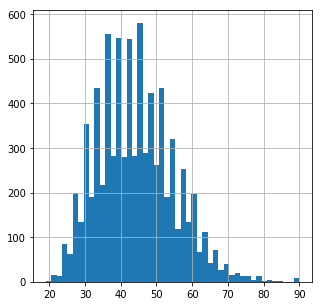

In [98]:
import matplotlib as mpl
import matplotlib.pyplot as plt
hist = df[df['salary'] == ' >50K'].age.hist(bins = 47, figsize=(5,5))

### 11. Determine the proportion of males and females in the group that earns more than 50 K
 

In [66]:
df[df['salary'] == ' >50K'].sex.describe()
Male_prop=df[df['salary'] == ' >50K'].sex.describe().freq/7841
Female_prop=1-Male_prop
print("Proportion of males in the group that earns more than 50 K :",Male_prop)
print("Proportion of females in the group that earns more than 50 K :",Female_prop) 

Proportion of males in the group that earns more than 50 K : 0.8496365259533223
Proportion of females in the group that earns more than 50 K : 0.15036347404667771


### 12. Investigate if gender and income are independent? Use the chi-square test of independence.


The 2x2 contingency table for salary vs gender is as follows:

In [71]:
pd.crosstab(df.sex,df.salary,margins=True)

salary,<=50K,>50K,All
sex,,,
Female,9592,1179,10771
Male,15128,6662,21790
All,24720,7841,32561


Performing Chi-square test for independence

In [78]:
import scipy.stats as scs
import researchpy as rp
table, results = rp.crosstab(df['salary'], df['sex'], prop= 'col', test= 'chi-square')
results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,1518.8868
1,p-value =,0.0000
2,Cramer's phi =,0.2160


The p-value is < 0.05 , which indicates that on the basis of the given data we can reject H0 at 5% level of sinificance. Thus we conclude that The variable **gender** and **salary** are not independent. 

### 13. Subset the numerical variables of your dataset into a separate dataframe. Plot the scatter matrix for each pair of variables.


In [84]:
df_numerical = pd.DataFrame(df.loc[:,df.dtypes == 'int64'])
df_numerical.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours per week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


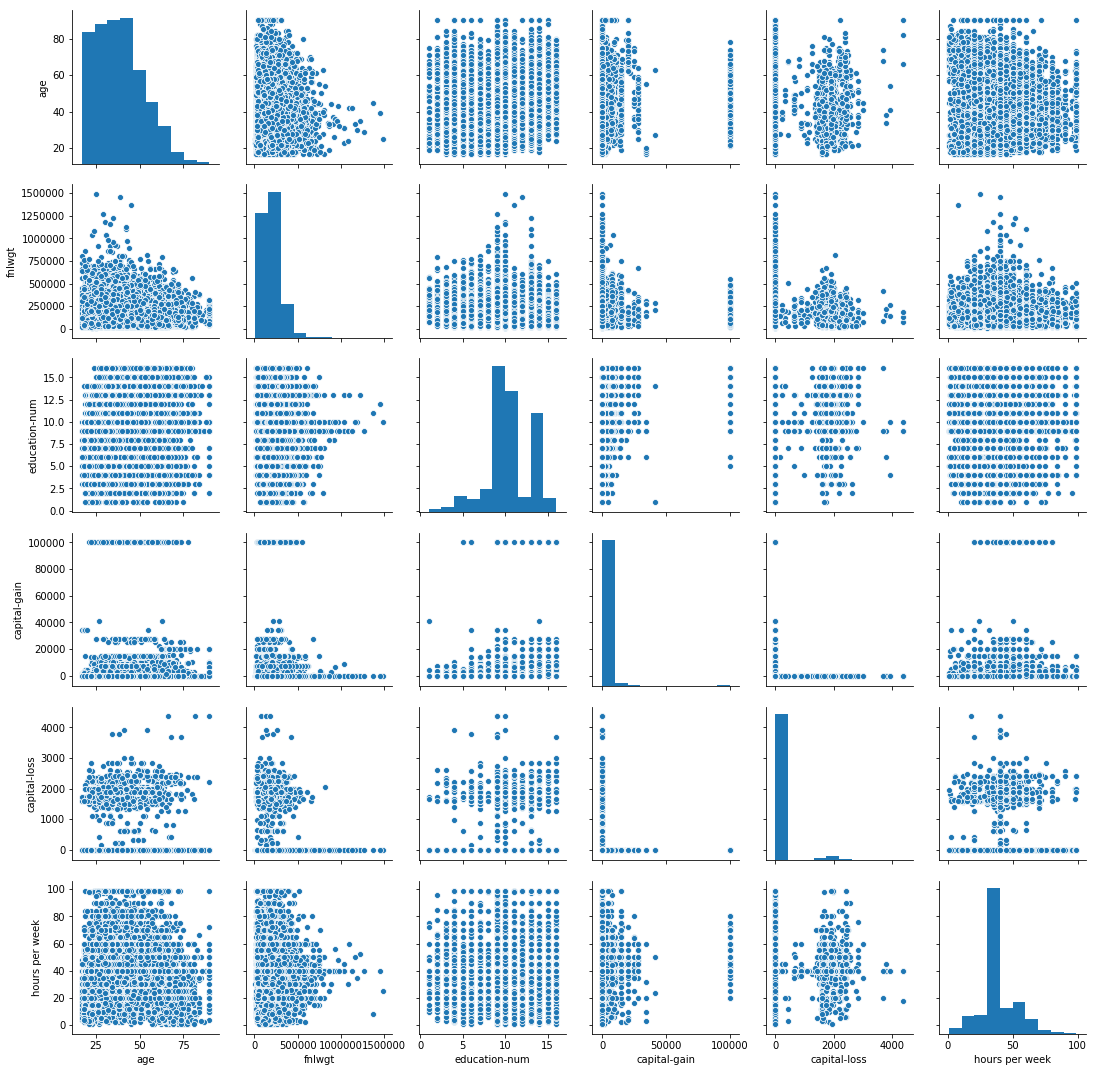

In [85]:
import seaborn as sns
sns.pairplot(df_numerical)

### 14. Some examples of attribute noise include: 
- Unknown or missing values 
- Incorrect values (values that violate the range of values possible for the attribute)Does this dataset have noisy attributes? Provide your assessment of how many attributes have this problem.


In [87]:
df.isnull().sum()

age               0
work class        0
fnlwgt            0
education         0
education-num     0
marital status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours per week    0
native-country    0
salary            0
dtype: int64

By trial we find that missing values in the dataset are marked as ' ?'. We try to find which columns are these.

In [119]:
print(df['work class'].unique())
print(df.loc[df['work class'] == ' ?']['work class'].count())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
1836


In [120]:
print(df.education.unique())
print(df.loc[df['education'] == ' ?'].education.count())

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
0


In [122]:
print(df['marital status'].unique())
print(df.loc[df['marital status'] == ' ?']['marital status'].count())

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
0


In [123]:
print(df.occupation.unique())
print(df.loc[df['occupation'] == ' ?'].occupation.count())

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
1843


In [124]:
print(df.relationship.unique())
print(df.loc[df['relationship'] == ' ?'].relationship.count())

[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
0


In [127]:
print(df.race.unique())
print(df.loc[df['race'] == ' ?'].race.count())

[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
0


In [128]:
print(df.sex.unique())
print(df.loc[df['sex'] == ' ?'].sex.count())

[' Male' ' Female']
0


In [130]:
print(df['native-country'].unique())
print(df.loc[df['native-country'] == ' ?']['native-country'].count())

[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']
583


In [132]:
print(df.salary.unique())
print(df.loc[df['salary'] == ' ?'].salary.count())

[' <=50K' ' >50K']
0


There are missing values in the three columns of the dataframe. These columns are occupation, workclass and  native-country. From the description of the variables before and from the boxplots later on we get the idea that the numerical variable capital-gain shows plenty of values outside its first and third quartiles. So it is most probably a noisy attribute as well.

### 15. What is the Interquartile-Range for an attribute? How can it be used for determining outliers for an attribute. Generate box-plots for the continuous attributes.


IQR is a quantile measure of dispersion of the data. It gives the range of the interval where 50% of the observations lies in.The Interquartile range (IQR) is defined as follows:

\begin{equation*}
IQR = Q_3-Q_1
\end{equation*}
Where  $Q_3$ and  $Q_1$ is the 75% and 25% quantiles respectively

To identify outliers using IQR we define limits on the sample values that are a factor $\alpha$ of the IQR below $Q_1$ or above $Q_3$.
<br>For $\alpha$=1.5 , an observation lying outside [ $Q_1$-1.5\*IQR , $Q_3$+1.5\*IQR ] is considered as an outliar. 

On a box and whisker plot, these limits are drawn as fences on the whiskers (or the lines) that are drawn from the box. Values that fall outside of these values are drawn as dots.

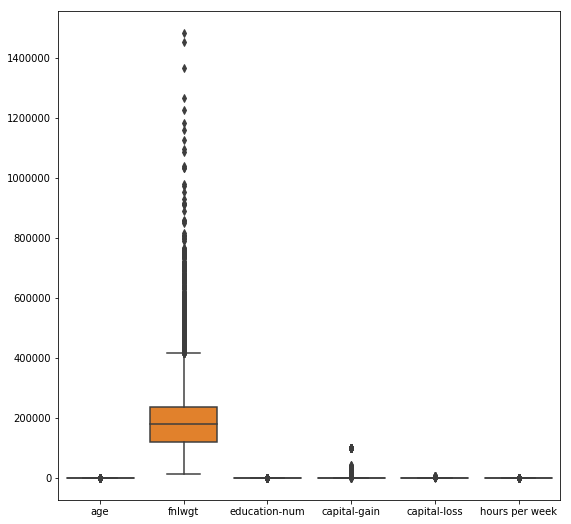

In [106]:
plt.figure(figsize=(9,9))
sns.boxplot(data=df_numerical,orient='v')

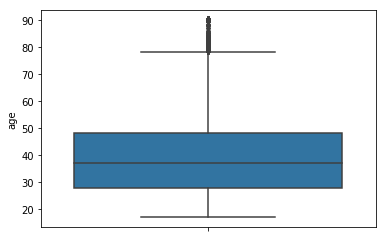

In [108]:
sns.boxplot(df_numerical['age'],orient='v')

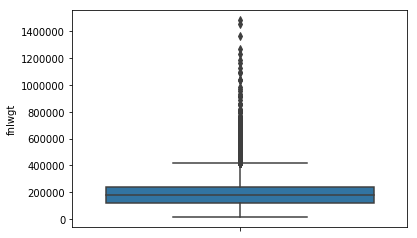

In [110]:
sns.boxplot(df_numerical['fnlwgt'],orient='v')

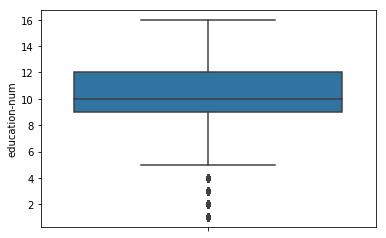

In [111]:
sns.boxplot(df_numerical['education-num'],orient='v')

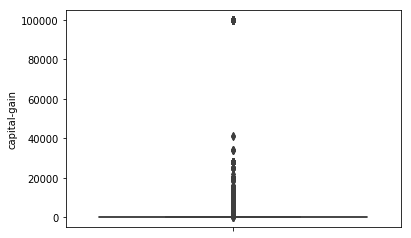

In [112]:
sns.boxplot(df_numerical['capital-gain'],orient='v')

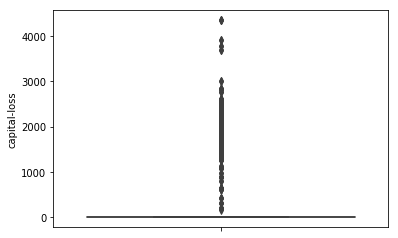

In [113]:
sns.boxplot(df_numerical['capital-loss'],orient='v')

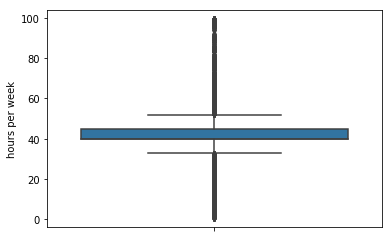

In [114]:
sns.boxplot(df_numerical['hours per week'],orient='v')